# PlotResults

In [1]:
# imports
import os
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook

## Plotting Code

In [7]:
def load_results(res_dir):
    results = []
    for filename in os.listdir(res_dir):
        if not filename.endswith(".npy"): continue
        filepath = os.path.join(res_dir, filename)
        res = np.load(filepath)
        if len(res) != 201: continue
        results.append(res)
    results = np.vstack(results)
    return results

def load_lt_results(lt_dir):
    results = []
    for filename in os.listdir(lt_dir):
        if not filename.endswith("_longtail.pkl"): continue
        filepath = os.path.join(lt_dir, filename)
        save_dict = pickle.load(open(filepath, "rb"))
        res = save_dict["eps-returns"]
        results.append(res)
    return results

def plot_results(results):
    sns.set(style="darkgrid", font_scale=1.0)
    fig, ax = plt.subplots(figsize=(10,5))
    # dataframe magic; needed for seaborn
    df = pd.DataFrame(results).melt()
    df.rename(columns={"variable":"timestep",
                       "value":"return"},
              inplace=True)
    sns.lineplot(x="timestep", y="return", data=df, ax=ax)
    ax.set(title=f"Avg Return for TD3 on HalfCheetah")
    ax.set_xticks(np.arange(0, len(results[0]), 20))
    values = list(np.arange(0,int(1e6)+1,int(1e5)))
    ax.set_xticklabels(values)

def plot_lt_results(lt_results, kde=True):
    num_seeds = len(lt_results)
    for i in range(num_seeds):
        y = lt_results[i]
        fig, ax = plt.subplots(figsize=(10,5))
        if kde:
            sns.kdeplot(y, fill=True, cut=0, ax=ax)
        else:
            ax.hist(y, bins=100)
        ax.set(xlabel="return", ylabel="density",
               title=f"Seed{i}: Density of returns")
    plt.show()

## Results for TD3 on HalfCheetah

### Training Results
5 seeds; trained for 1e6 timesteps; shaded area corresponds to 95% confidence interval

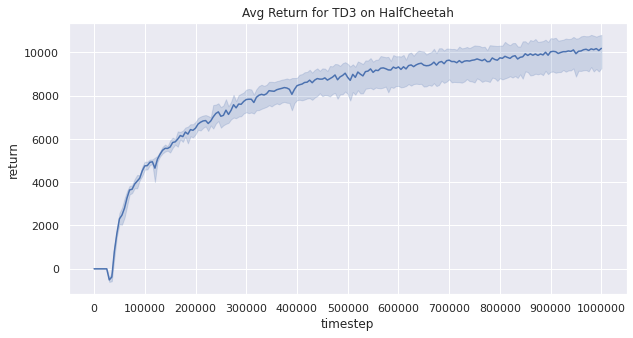

In [4]:
res_dir = "./results0"
results = load_results(res_dir)
plot_results(results)

### LongTail Evaluation

Evaluated on 1000 episodes

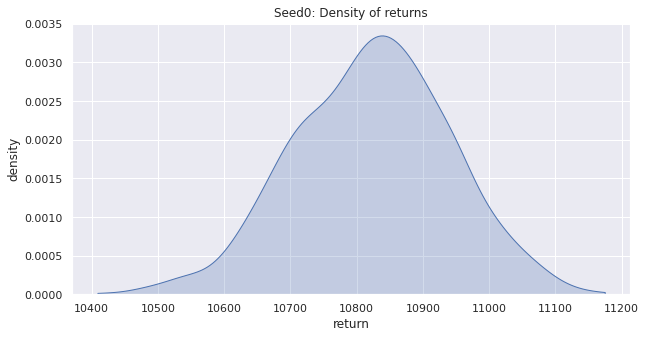

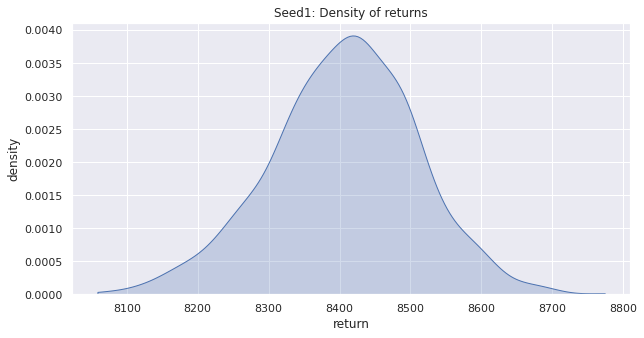

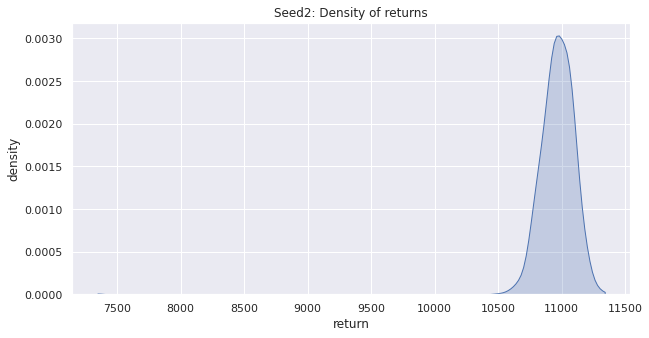

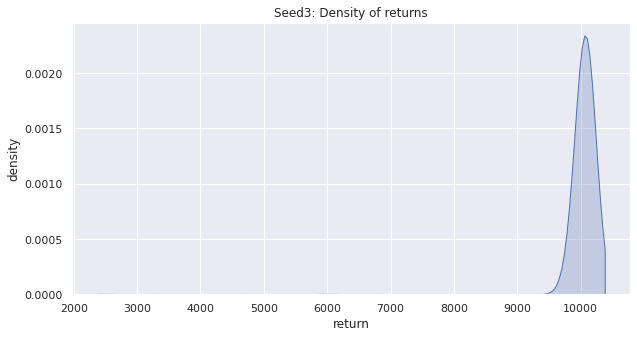

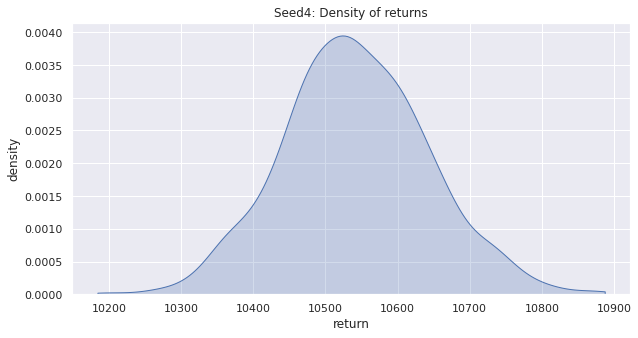

In [11]:
lt_dir = "./longtail_results"
lt_results = load_lt_results(lt_dir)
plot_lt_results(lt_results, kde=True)

# The End